# Finite differences

Similar to the handout from class, let's compute forward- and center-difference approximations for the first derivative $f'(x)$ of the function $f(x) = \sin(x)$.   In particular, we'll compute $f'(1)$ compared to the exact result $\cos(1)$ as a function of the step size $\Delta x$.

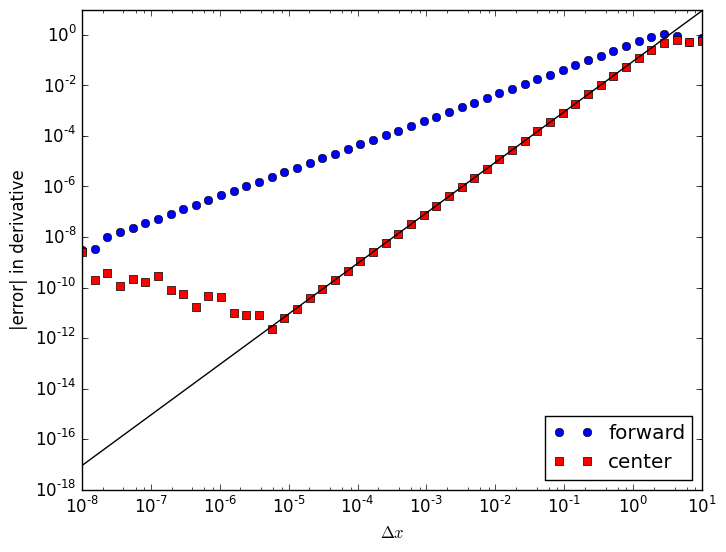

PyObject <matplotlib.legend.Legend object at 0x314b76d10>

In [1]:
x = 1
Δx = logspace(-8, 1, 50)                # 50 logarithmically spaced points from 0.00000001 to 10 (type Δx via \Delta<TAB>x)
f = (sin(x+Δx) - sin(x)) ./ Δx          # forward difference ... note that ./ means element-wise division
c = (sin(x+Δx) - sin(x-Δx)) ./ (2Δx)    # center difference

using PyPlot
loglog(Δx, abs(cos(x) - f), "bo")
loglog(Δx, abs(cos(x) - c), "rs")
loglog(Δx, Δx.^2 * cos(x)/6, "k-")      # plot center-difference error estimate from Taylor expansion
xlabel(L"$\Delta x$")
ylabel("|error| in derivative")
legend(["forward", "center"], loc="lower right")

# Finite-difference Laplacian

As in class, we apply the center-difference approximation twice to approximate $\hat{A} = \frac{\partial^2}{\partial x^2}$ by a matrix $A$ on $N$ equally spaced points on $x \in [0,L]$, for functions $u(x)$ with Dirichlet boundary conditions $u(0) = u(L) = 0$.

(The `diagm(v, n)` command in Julia takes a vector `v` and makes a square matrix with `v` on the `n`-th diagonal.)

In [2]:
N = 200
L = 1
Δx = L / (N+1)
A = (-2*diagm(ones(N)) + diagm(ones(N-1),1) + diagm(ones(N-1),-1)) / (Δx)^2

200x200 Array{Float64,2}:
 -80802.0   40401.0       0.0       0.0  …       0.0       0.0       0.0
  40401.0  -80802.0   40401.0       0.0          0.0       0.0       0.0
      0.0   40401.0  -80802.0   40401.0          0.0       0.0       0.0
      0.0       0.0   40401.0  -80802.0          0.0       0.0       0.0
      0.0       0.0       0.0   40401.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0  …       0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0  …       0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      ⋮                  

We'll use the `eig` command to compute the eigenvalues `λ` (typed as `\lambda` followed by tab) and the eigenvectors `X` (`X` is a matrix whose columns are the eigenvectors.)

In [3]:
λ, X = eig(A)

([-1.61594e5,-1.61565e5,-1.61515e5,-1.61446e5,-1.61357e5,-161249.0,-1.61121e5,-1.60973e5,-1.60806e5,-160619.0  …  -984.953,-798.121,-630.832,-483.128,-355.045,-246.615,-157.862,-88.8102,-39.4752,-9.8694],
200x200 Array{Float64,2}:
  0.00155903  -0.00311767   0.00467555  …  -0.00311767  0.00155903
 -0.00311767   0.00623229  -0.00934083     -0.00623229  0.00311767
  0.00467555  -0.00934083   0.0139856      -0.00934083  0.00467555
 -0.00623229   0.0124402   -0.0185996      -0.0124402   0.00623229
  0.00778751  -0.0155275    0.0231727      -0.0155275   0.00778751
 -0.00934083   0.0185996   -0.0276948   …  -0.0185996   0.00934083
  0.0108919   -0.0216535    0.0321561      -0.0216535   0.0108919 
 -0.0124402    0.0246862   -0.0365468      -0.0246862   0.0124402 
  0.0139856   -0.0276948    0.040857       -0.0276948   0.0139856 
 -0.0155275    0.0306764   -0.0450775      -0.0306764   0.0155275 
  0.0170656   -0.033628     0.0491988   …  -0.033628    0.0170656 
 -0.0185996    0.0365468   -0.05

The eigenvalues are all negative and are sorted in increasing order, so that the eigenvalues of smallest magnitude are *last*.  `flipdim(λ,1)` reverses the order, so that the smallest-magnitude eigenvalues are *first*.   We then take the first five of these eigenvalues (`1:5` denotes the indices `1,2,3,4,5`) and compare them to the exact eigenvalues $-(n\pi/L)^2$ of $\partial^2/\partial x^2$:

In [5]:
(flipdim(λ,1)[1:5] - -((1:5) * π / L).^2) ./ (flipdim(λ,1)[1:5])

5-element Array{Float64,1}:
 -2.03578e-5 
 -8.14343e-5 
 -0.000183238
 -0.000325785
 -0.000509095

If we go back and double $N$ (halving $\Delta x$), we'll find that the error becomes smaller by roughly a factor of 4, just as we would expect from the second-order convergence of the center-difference approximation we used.

Notice that the fractional error (the difference divided by $\lambda$) in the eigenvalue *increases* with increasing $n$.  The reason is that larger-$n$ eigenfunctions are more oscillatory, and the same $\Delta x$ gives a worse approximation for the derivative if the function is oscillating faster compared to the grid.

Now, let's plot a few of the eigenfunctions corresponding to the *last* few eigenvalues, i.e. the smallest-$|\lambda|$ eigenvalues:

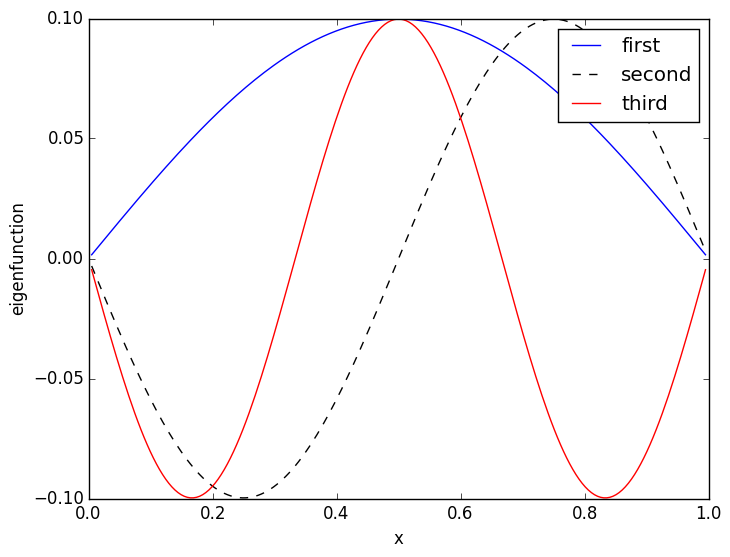

PyObject <matplotlib.legend.Legend object at 0x3154e2ed0>

In [6]:
x = [1:N]*Δx
plot(x, X[:,end], "b-")
plot(x, X[:,end-1], "k--")
plot(x, X[:,end-2], "r-")
xlabel("x")
ylabel("eigenfunction")
legend(["first", "second", "third"])

As we might have hoped, these are *very good* approximations for the exact eigenfunctions $\sin(n\pi x/L)$ ($n=1,2,3$) of the second-derivative operator.

In contrast, if we look at one of the largest-$|\lambda|$ eigenvectors, we get something highly oscillatory that doesn't much resemble the corresponding eigenfunction of $\partial^2/\partial x^2$.  This eigenfunction oscillates in sign from one grid point to the next, and the finite-difference approximation is nothing like a derivative:

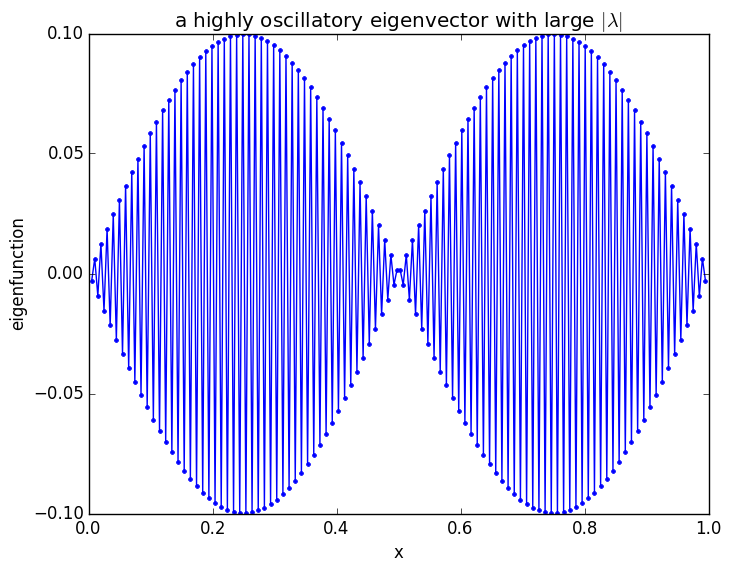

PyObject <matplotlib.text.Text object at 0x31554b950>

In [7]:
plot(x, X[:,2], "b.-")
xlabel("x")
ylabel("eigenfunction")
title(L"a highly oscillatory eigenvector with large $|\lambda|$")